In [1]:
import numpy as np 
from environment2_v3 import Env_v2
from environment3_v1 import Env_v3 

import matplotlib.pyplot as plt 

from stable_baselines3 import PPO, A2C, DDPG, TD3
from stable_baselines3.common.evaluation import evaluate_policy 
from stable_baselines3.common.monitor import Monitor 
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.callbacks import CheckpointCallback, EvalCallback
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
from stable_baselines3.common.buffers import ReplayBuffer
from stable_baselines3.common.env_util import make_vec_env

from typing import Callable

def linear_schedule(initial_value: float) -> Callable[[float], float]:
    def func(progress_remaining: float) -> float:
        return progress_remaining * initial_value
    return func

In [3]:
env1 = Env_v2() 

def f():
    env1.reset() 
    env1.step(env1.action_space.sample())
%timeit f() 

c:\users\emelf\onedrive - usn\phd - sysopt\python work\custom modules\syngenloss_v2\SynGenLoss_v2\Model1\CapDiag.py:34: RuntimeWarning: invalid value encountered in arccos
  delta = np.arccos(cos_delta)


306 ms ± 46.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [2]:
env2 = Env_v3() 

def f():
    env2.reset() 
    env2.step(env2.action_space.sample())
%timeit f() 

c:\users\emelf\onedrive - usn\phd - sysopt\python work\custom modules\syngenloss_v2\SynGenLoss_v2\Model1\CapDiag.py:34: RuntimeWarning: invalid value encountered in arccos
  delta = np.arccos(cos_delta)
c:\users\emelf\onedrive - usn\phd - sysopt\python work\custom modules\syngenloss_v2\SynGenLoss_v2\Model1\CapDiag.py:34: RuntimeWarning: invalid value encountered in arccos
  delta = np.arccos(cos_delta)


1.76 ms ± 444 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
env1.rescale_obs(env1.reset())  

array([41.95966  , 17.39948  , 14.537831 , 39.603252 , 63.552372 ,
       -8.294243 , -1.0879383,  0.2584057,  0.7537651,  3.1634216,
        0.9473388,  0.       ], dtype=float32)

In [11]:
env2.rescale_obs(env2.reset())  

array([ 6.80842285e+01,  1.33567705e+01,  1.43761368e+01,  4.01725159e+01,
        6.30043564e+01, -5.29208374e+00, -5.76879406e+00,  5.61546326e-01,
        1.04331589e+00,  2.93257141e+00,  9.30683374e-01,  2.58684158e-05],
      dtype=float32)

In [2]:
# # Generate test env data: 
# env = Env_v2() 
# P_gs_data = [] 
# Q_out_req_data = []
# V_exts_data = [] 
# for i in range(100):
#     obs = env.reset() 
#     P_gs_data.append(env.P_gs_mva)
#     Q_out_req_data.append(env.Q_out_req)
#     V_exts_data.append(env.V_ext) 
    
# np.save("test_env_data2//P_gs.npy", np.array(P_gs_data))
# np.save("test_env_data2//Q_out_req.npy", np.array(Q_out_req_data))
# np.save("test_env_data2//V_exts.npy", np.array(V_exts_data))

In [2]:
env = Monitor(Env_v3())

checkpoint_callback = CheckpointCallback(
  save_freq=1000,
  save_path="RL_folder//third_model//",
  name_prefix="rl_model_v1",
)

eval_callback = EvalCallback(env, best_model_save_path="RL_folder//third_model//best_models",
                             log_path="RL_folder//third_model//", eval_freq=1000, n_eval_episodes=100,
                             deterministic=True, render=False)

n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.05 * np.ones(n_actions))
policy_kwargs = dict(net_arch=dict(qf=[8, 8], pi=[8, 8]))
tau = 0.005
batch_size = 500
model = TD3("MlpPolicy", env, action_noise=action_noise, verbose=0, gamma=0.99, policy_kwargs=policy_kwargs, tau=tau, batch_size=batch_size, learning_rate=1e-4)
model = model.learn(10000, callback=[checkpoint_callback, eval_callback])

c:\users\emelf\onedrive - usn\phd - sysopt\python work\custom modules\syngenloss_v2\SynGenLoss_v2\Model1\CapDiag.py:34: RuntimeWarning: invalid value encountered in arccos
  delta = np.arccos(cos_delta)
c:\users\emelf\onedrive - usn\phd - sysopt\python work\custom modules\syngenloss_v2\SynGenLoss_v2\Model1\CapDiag.py:34: RuntimeWarning: invalid value encountered in arccos
  delta = np.arccos(cos_delta)


KeyboardInterrupt: 

In [2]:
env = Monitor(Env_v3())

eval_callback = EvalCallback(env, best_model_save_path="RL_folder//third_model//best_models",
                             log_path="RL_folder//third_model//", eval_freq=20000, n_eval_episodes=10,
                             deterministic=True, render=False)

model = PPO("MlpPolicy", env, verbose=0, n_steps=2048, gamma=1.0, batch_size=1024, learning_rate=linear_schedule(1e-3))
model = model.learn(100000, callback=[eval_callback]) 

c:\users\emelf\onedrive - usn\phd - sysopt\python work\custom modules\syngenloss_v2\SynGenLoss_v2\Model1\CapDiag.py:34: RuntimeWarning: invalid value encountered in arccos
  delta = np.arccos(cos_delta)
c:\users\emelf\onedrive - usn\phd - sysopt\python work\custom modules\syngenloss_v2\SynGenLoss_v2\Model1\CapDiag.py:34: RuntimeWarning: invalid value encountered in arccos
  delta = np.arccos(cos_delta)


Eval num_timesteps=20000, episode_reward=-23.81 +/- 8.12
Episode length: 10.00 +/- 0.00
New best mean reward!
Eval num_timesteps=40000, episode_reward=-14.13 +/- 10.05
Episode length: 6.60 +/- 3.41
New best mean reward!
Eval num_timesteps=60000, episode_reward=-24.92 +/- 24.32
Episode length: 7.40 +/- 2.76
Eval num_timesteps=80000, episode_reward=-23.92 +/- 10.88
Episode length: 10.00 +/- 0.00
Eval num_timesteps=100000, episode_reward=-18.00 +/- 10.73
Episode length: 8.00 +/- 2.24


In [9]:
dQ_vals = []
Vg_vals = []
obs = env.reset() 
print(env.rescale_obs(obs) )
dQ_vals.append(env.rescale_obs(obs)[-2])
Vg_vals.append(env.V_gs)
done = False 
while not done: 
    action, _ = model.predict([obs], deterministic=True)
    new_obs, reward, done, info = env.step(action[0]) 
    dQ_vals.append(env.rescale_obs(new_obs)[-2])
    Vg_vals.append(env.V_gs)
    obs = new_obs 

[ -4.1664124  -18.632782   -14.466385     0.99578273]


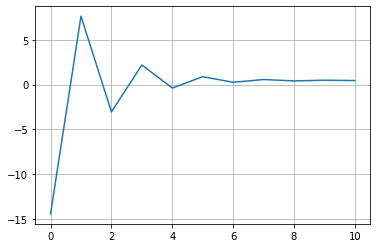

In [10]:
plt.plot(dQ_vals) 
plt.grid() 

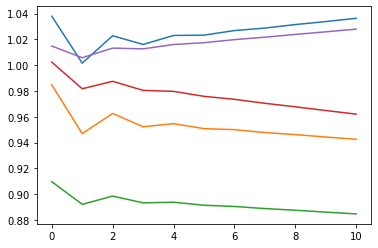

In [11]:
plt.plot(Vg_vals)

In [12]:
dQ_vals

[-14.466385,
 7.6540833,
 -3.04467,
 2.1974106,
 -0.37776184,
 0.8880615,
 0.2655716,
 0.57157135,
 0.42093658,
 0.4949112,
 0.45835114]

In [11]:
env.scale_action(action[0])

array([ 0.0976406 ,  0.12041107,  0.00500232, -0.07539764,  0.10150224],
      dtype=float32)

In [12]:
new_obs, reward, done, info = env.step(action[0]) 
new_obs 

array([-0.8137457 ,  0.65638125,  0.829201  ,  0.9758146 ,  0.3907107 ,
        0.41319048, -1.5657927 , -1.1809415 , -0.06246489,  0.28367376,
        0.18582225, -0.6644611 , -0.82440174, -0.5104463 , -0.12806886,
        0.35167825,  0.10233164], dtype=float32)

In [13]:
env.rescale_obs(new_obs) 

array([  9.592097  ,  16.563812  ,  19.20661   ,  59.274437  ,
        50.065586  ,  42.558624  , -31.315853  , -24.79977   ,
        -3.7478943 ,  20.424515  ,   1.0185822 ,   0.9335539 ,
         0.9175598 ,   0.94895536,   0.9871931 ,  35.16783   ,
         1.0102332 ], dtype=float32)

In [18]:
env = make_vec_env(Env_v3, n_envs=4)

checkpoint_callback = CheckpointCallback(
  save_freq=1000,
  save_path="RL_folder//third_model//",
  name_prefix="rl_model_v1",
)

eval_callback = EvalCallback(env, best_model_save_path="RL_folder//third_model//best_models",
                             log_path="RL_folder//third_model//", eval_freq=1000, n_eval_episodes=100,
                             deterministic=True, render=False)

model = PPO("MlpPolicy", env, verbose=0, n_steps=1000, gamma=1.0, batch_size=1000)
model = model.learn(10000, callback=[checkpoint_callback, eval_callback]) 

Eval num_timesteps=4000, episode_reward=-0.00 +/- 0.00
Episode length: 1.00 +/- 0.00
New best mean reward!
Eval num_timesteps=8000, episode_reward=-0.10 +/- 0.11
Episode length: 1.00 +/- 0.00
Eval num_timesteps=12000, episode_reward=-0.08 +/- 0.07
Episode length: 1.00 +/- 0.00


In [7]:
# Hyperparameters: 
N_train_steps = 30000  
N_retry = 3
N_eval_eps = 10
NN_sizes = [([32, 32], [32, 32]), ([64, 64], [64, 64]), ([512, 512], [512, 512]), ([1024], [1024])]
learning_rates = [1e-2, 1e-3, 1e-4]
batch_sizes = [2**7, 2**9, 2**11]

env = Env_v3

rewards = np.zeros((len(NN_sizes)*len(batch_sizes)*len(learning_rates), N_retry))
stds = np.zeros((len(NN_sizes)*len(batch_sizes)*len(learning_rates), N_retry))
for i1, lr in enumerate(learning_rates):
    for i2, (NN_pi, NN_vf) in enumerate(NN_sizes): 
        for i3, batch_size in enumerate(batch_sizes):
            idx = i1*(len(NN_sizes)*len(batch_sizes)) + i2*len(batch_sizes) + i3
            policy_kwargs = dict(net_arch=[dict(vf=NN_vf, pi=NN_pi)])
            for i in range(N_retry):
                model = PPO("MlpPolicy", env, verbose=0, n_steps=batch_size*2, gamma=1.0, batch_size=batch_size, learning_rate=linear_schedule(lr))
                model.learn(N_train_steps)
                rew, std = evaluate_policy(model, env, N_eval_eps, deterministic=True)
                rewards[idx, i] = rew 
                stds[idx, i] = std 

                res_str = f"NN_vf = {NN_vf}, NN_pi = {NN_pi}, BS = {batch_size}, lr = {lr}, eval_reward = {rew:.3f}, eval_std = {std:.3f}"
                print(res_str)

save_name_rew = "RL_folder//hyperparam_search2//rewards.npy"
save_name_std = "RL_folder//hyperparam_search2//stds.npy"
np.save(save_name_rew, rewards)
np.save(save_name_std, stds)

c:\users\emelf\onedrive - usn\phd - sysopt\python work\custom modules\syngenloss_v2\SynGenLoss_v2\Model1\CapDiag.py:34: RuntimeWarning: invalid value encountered in arccos
  delta = np.arccos(cos_delta)


NN_vf = [32, 32], NN_pi = [32, 32], eval_reward = -0.004, eval_std = 0.004
NN_vf = [64, 64], NN_pi = [64, 64], eval_reward = -0.003, eval_std = 0.003
NN_vf = [512, 512], NN_pi = [512, 512], eval_reward = -0.006, eval_std = 0.007
NN_vf = [1024], NN_pi = [1024], eval_reward = -0.011, eval_std = 0.010


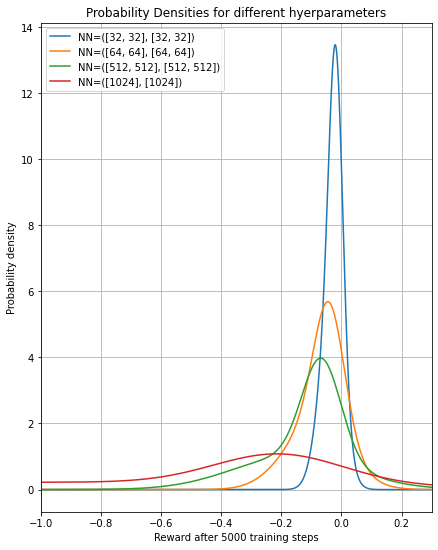

In [25]:
from scipy.stats import norm 

fig, ax = plt.subplots(1, 1)
labels = []
for i, (NN_vf, NN_pi) in enumerate(NN_sizes): 

    idx = i
    res_str = f"NN=({NN_vf}, {NN_pi})"
    labels.append(res_str)

linestyles = ["solid"]*10 + ["dashed"]*10 + ["dotted"]*4 
linestyles = ["solid"]*4
rew_vals = np.linspace(-1, 0.3, 1000)
for rew, std, label, ls in zip(rewards, stds, labels, linestyles): 
    vals1 = norm(rew[0], std[0]).pdf(rew_vals)
    vals2 = norm(rew[1], std[1]).pdf(rew_vals)
    ax.plot(rew_vals, (vals1+vals2)/2, label=label, linestyle=ls) 
    
ax.grid() 
ax.set_xlim(rew_vals[0], rew_vals[-1])
# ax.legend(loc='upper right', bbox_to_anchor=(0.27, 0.5, 0.5, 0.5)) 
ax.legend()     
ax.set_xlabel("Reward after 5000 training steps")
ax.set_ylabel("Probability density")
ax.set_title("Probability Densities for different hyerparameters")
fig.set_figheight(9)
fig.set_figwidth(7)

plt.savefig("figures/hyperparam_tuning.pdf", dpi=300, format="pdf", bbox_inches='tight')
plt.show() 

In [26]:
env = Monitor(Env_v2())

checkpoint_callback = CheckpointCallback(
  save_freq=1000,
  save_path="RL_folder//third_model//",
  name_prefix="rl_model_v1",
)

eval_callback = EvalCallback(env, best_model_save_path="RL_folder//third_model//best_models",
                             log_path="RL_folder//third_model//", eval_freq=1000, n_eval_episodes=100,
                             deterministic=True, render=False)

model = PPO("MlpPolicy", env, verbose=0, n_steps=100, gamma=1.0, batch_size=100)
model = model.learn(20000, callback=[checkpoint_callback, eval_callback]) 

c:\users\emelf\onedrive - usn\phd - sysopt\python work\custom modules\syngenloss_v2\SynGenLoss_v2\Model1\CapDiag.py:34: RuntimeWarning: invalid value encountered in arccos
  delta = np.arccos(cos_delta)


Eval num_timesteps=1000, episode_reward=-0.17 +/- 0.17
Episode length: 1.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-0.31 +/- 0.39
Episode length: 1.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-0.76 +/- 0.59
Episode length: 1.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-1.40 +/- 1.35
Episode length: 1.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-0.59 +/- 0.55
Episode length: 1.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=-6.84 +/- 4.01
Episode length: 1.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=-3.21 +/- 1.52
Episode length: 1.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=-3.49 +/- 1.24
Episode length: 1.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=-3.01 +/- 0.91
Episode length: 1.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-3.23 +/- 0.68
Episode length: 1.00 +/- 0.00
Eval num_timesteps=11000, episode_reward=-3.44 +/- 0.89
Episode length: 1.00 +/- 0.00
Eval num_timesteps=12000, episode_reward=